In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulator import *

In [2]:
np.set_printoptions(threshold=1e6)
plt.rcParams['figure.figsize'] = [15, 12]

In [3]:
def simulate_trace(trace, cache_size, catalog_size, sample_size, cache_init=None):
    timer = Timer()
    timer.tic()

    if cache_init is None:
        cache_init = init_cache(cache_size, catalog_size)

    cache_LRU = LRU(cache_size, catalog_size, cache_init)
    cache_LFU = LFU(cache_size, catalog_size, cache_init)

    cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
    cache_OGD = OGD(cache_size, catalog_size, sample_size)
    cache_EP_WM = ExpertCache(cache_size, catalog_size, cache_init, eps= 0.01, alg="WM")
    cache_EP_RWM = ExpertCache(cache_size, catalog_size, cache_init, eps= 0.01, alg="RWM")
    cache_FTPL = FTPL(cache_size, catalog_size, cache_init)

    OGD_init = lambda cache_size, catalog_size, cache_init: OGD(cache_size, catalog_size, sample_size)
    experts = (LRU, LFU, OGD_init, FTPL)

    cache_EP_neq = ExpertsCacheNeq(cache_size, catalog_size, cache_init, experts)
    cache_EP_evict = ExpertsCacheEvict(cache_size, catalog_size, cache_init, alg="WM")
    cache_EP_evict_HS = ExpertsCacheEvict(cache_size, catalog_size, cache_init, alg="WM-HS")

    trace = trace[:sample_size]
    
    print("LRU")
    cache_LRU.simulate(trace)
    timer.toc()

    print("LFU")
    cache_LFU.simulate(trace)
    timer.toc()

    print("Best static")
    cache_BH.simulate(trace)
    timer.toc()

    print("Experts WM")
    cache_EP_WM.simulate(trace)
    timer.toc()

    print("Experts RWM")
    cache_EP_RWM.simulate(trace)
    timer.toc()

    print("OGD")
    cache_OGD.simulate(trace)
    timer.toc()

    print("FTPL")
    cache_FTPL.simulate(trace)
    timer.toc()

    print("Experts WM no equalization")
    cache_EP_neq.simulate(trace)
    timer.toc()
    
    print("Expert Evict WM")
    cache_EP_evict.simulate(trace)
    timer.toc()
    
    print("Experts Evict WM HS")
    cache_EP_evict_HS.simulate(trace)
    timer.toc()
    
    
    
    caches_list = [cache_LRU, cache_LFU, cache_BH, cache_EP_WM, cache_EP_RWM, cache_OGD, cache_FTPL, cache_EP_neq, cache_EP_evict, cache_EP_evict_HS]
    caches_names = map(lambda x: x.get_name(), caches_list)
    caches_dict = dict(zip(caches_names, caches_list))
   
    return caches_dict

In [8]:
# snm_trace = shot_noise_model_matlab(shot_duration=100, shot_rate=0.3, simulation_time=1000, par_shape=0.4, par_scale=1.6, par_loc=2)
snm_trace = shot_noise_model(max_shot_duration=1000, shot_rate=0.5, simulation_time=2000, par_shape=0.8, par_scale=1.6, par_loc=1)

snm_sample_size, snm_catalog_size = get_trace_stats(snm_trace)

In [9]:
snm_trace

array([430, 430, 272, 573, 422, 422, 573, 145, 221,  26, 422,  31, 739,
       573,  26, 166, 430, 321, 739, 321, 321, 321, 321, 321, 321, 321,
       248, 321, 321, 739, 321,  26, 272, 321, 811, 321, 321, 321, 377,
       321, 325,  69, 321, 248, 272, 702, 887, 822, 822, 612, 321, 290,
       724, 325,  31, 573, 434, 321, 321, 321, 321, 321, 321, 290, 321,
       331, 321, 321, 321, 321, 321,  31, 416, 724,  26, 321, 354, 573,
       321, 321, 321, 321, 785, 676, 622, 422, 354, 622,  83, 622, 744,
       712, 622, 225, 909, 785, 241, 475, 475, 869, 166, 349, 832, 475,
       822, 354, 349, 863, 852, 153, 194, 580, 257, 475, 166, 832, 349,
       349, 869, 285, 798, 354, 416, 798, 455, 612, 160, 798, 160, 798,
       561, 561, 475, 561, 798, 257, 475, 160, 798, 561, 612, 133, 285,
       455, 292, 847, 612, 475, 561, 572, 422, 861, 338, 170, 160, 852,
       861, 861, 861, 451, 589, 210, 852, 225, 434, 869, 852, 861, 880,
       561, 861, 561, 880, 416,  33, 861, 561, 880, 861, 798,  6

In [10]:
cache_size = int(0.3*snm_catalog_size)
snm_caches = simulate_trace(snm_trace, cache_size, snm_catalog_size, snm_sample_size)

LRU



Elapsed time: 0.26383543014526367
LFU



Elapsed time: 0.4023318290710449
Best static



Elapsed time: 0.4405517578125
Experts WM



Elapsed time: 0.8773965835571289
Experts RWM



Elapsed time: 2.1732122898101807
OGD



Elapsed time: 2.9318058490753174
FTPL



Elapsed time: 3.6654250621795654
Experts WM no equalization



Elapsed time: 5.2808685302734375
Expert Evict WM



Elapsed time: 8.43928599357605
Experts Evict WM HS



Elapsed time: 11.173542022705078


In [19]:
%matplotlib ipympl
plot_comp(\
          snm_caches["LRU"],\
          snm_caches["LFU"],\
          snm_caches["CacheStatic"],\
#           snm_caches["ExpertCache WM"],\
#           snm_caches["ExpertCache RWM"],\
          snm_caches["OGD"],\
          snm_caches["FTPL"],\
#           snm_caches["Expert Cache without equalization WM"],\
          snm_caches["Expert Cache using eviction experts WM"],\
          snm_caches["Expert Cache using eviction experts WM-HS"],\
         )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
snm_caches.keys()

dict_keys(['LRU', 'LFU', 'CacheStatic', 'ExpertCache WM', 'ExpertCache RWM', 'OGD', 'FTPL', 'Expert Cache without equalization WM', 'Expert Cache using eviction experts WM', 'Expert Cache using eviction experts WM-HS'])

In [18]:
rnd_trace = np.random.randint(100, size=100000)
rnd_sample_size, rnd_catalog_size = get_trace_stats(rnd_trace)

rnd_cache_size = int(0.3*rnd_catalog_size)
rnd_caches = simulate_trace(rnd_trace, rnd_cache_size, rnd_catalog_size, rnd_sample_size)

LRU



Elapsed time: 3.1541507244110107
LFU



Elapsed time: 4.542125463485718
Best static



Elapsed time: 4.674980163574219
Experts WM



Elapsed time: 19.731064081192017
Experts RWM



Elapsed time: 32.83557915687561
OGD



Elapsed time: 36.472246170043945
FTPL



Elapsed time: 38.57099747657776
Experts WM no equalization



Elapsed time: 51.0452721118927
Expert Evict WM



Elapsed time: 75.8301637172699
Experts Evict WM HS



Elapsed time: 99.66831064224243


(0.28, 0.35)

/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


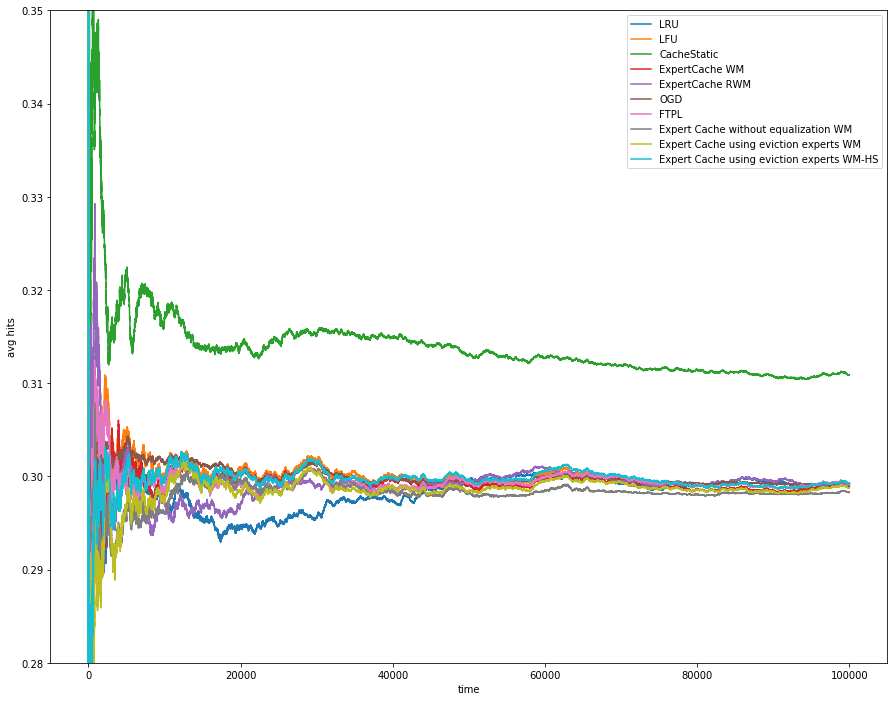

In [25]:
plot_comp(*list(rnd_caches.values()))
plt.ylim([0.28, 0.35])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from simulator import *


cache_size = 10

snm_trace = shot_noise_model_matlab(shot_duration=300, shot_rate=0.8, simulation_time=1000, par_shape=0.8, par_scale=1.6, par_loc=2)
snm_sample_size, snm_catalog_size = get_trace_stats(snm_trace)


catalog_size = snm_catalog_size

cache_init = init_cache(cache_size, catalog_size)

cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_EP = ExpertsCacheEvict(cache_size, catalog_size, cache_init, alg="WM-HS")


print("Cache init\t", cache_init)

for request in snm_trace:
    cache_LFU.request(request)
    cache_EP.request(request)
    
    print("Request", request)
    print("LFU\t\t", cache_LFU.cache)
    print("EP\t\t", cache_EP.cache)
    break



Cache init	 [665 411  89 145 532 540  17 329  81 123]
Request 682
LFU		 [682 411  89 145 532 540  17 329  81 123]
EP		 [682 411  89 145 532 540  17 329  81 123]


In [18]:
plt.plot(snm_caches["Expert Cache using eviction experts WM-HS"].expert_choices, '.')

In [14]:
np.sort(snm_caches["Expert Cache using eviction experts WM-HS"].cache)

array([  5,   8,   9,  12,  15,  19,  28,  30,  35,  36,  37,  38,  39,
        42,  46,  47,  58,  60,  61,  62,  63,  66,  71,  73,  75,  78,
        82,  86,  92,  93,  94,  97, 101, 103, 106, 107, 114, 116, 117,
       119, 122, 123, 127, 131, 132, 141, 142, 144, 147, 154, 157, 158,
       159, 161, 162, 167, 168, 173, 174, 177, 181, 185, 187, 189, 191,
       193, 196, 202, 206, 216, 218, 221, 224, 228, 229, 233, 236, 239,
       240, 241, 242, 243, 245, 255, 256, 257, 260, 265, 270, 277, 279,
       281, 282, 285, 286, 287, 291, 292, 294, 296, 298, 309, 311, 314,
       317, 319, 324, 331, 333, 338, 339, 346, 347, 351, 352, 353, 355,
       359, 363, 374, 378, 381, 383, 384, 402, 404, 407, 416, 417, 419,
       426, 443, 444, 445, 451, 452, 453, 455, 457, 458, 462, 465, 470,
       471, 475, 479, 480, 481, 482, 485, 487, 489, 494, 503, 512, 518,
       522, 523, 526, 527, 533, 537, 542, 548, 549, 553, 570, 571, 573,
       576, 582, 586, 589, 598, 600, 605, 606, 607, 609, 615, 61

In [16]:
np.sort(snm_caches["LRU"].cache) - np.sort(snm_caches["Expert Cache using eviction experts WM-HS"].cache)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
snm_caches["LRU"].get_hitrate() - snm_caches["Expert Cache using eviction experts WM-HS"].get_hitrate()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [22]:
snm_caches["LRU"].hits - np.array(snm_caches["Expert Cache using eviction experts WM-HS"]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [23]:
def list_sub(x, y):
    return [xx - yy for xx, yy in zip(x, y)]

In [25]:
list_sub(snm_caches["LRU"].hits, snm_caches["Expert Cache using eviction experts WM-HS"].hits)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0